<a href="https://colab.research.google.com/github/sivasurasani/Material-Science-Research/blob/main/01182025_code_analysis_v_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Static variables

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the work hardening function
# def work_hardening(true_stress, true_strain):
#     if len(true_stress) != len(true_strain):
#         raise ValueError("true_stress and true_strain must have the same length")

#     if len(true_stress) < 2:
#         return np.array([])

#     work_hardening_rate = np.diff(true_stress) / np.diff(true_strain)
#     return work_hardening_rate

# # Read the Excel file
# data = pd.read_excel('Eng Values.xlsx')
# if 't.stress' not in data.columns and 't.strain' not in data.columns:
#     data['t.stress'] = data['eng.stress'] * (1 + data['eng.strain'])
#     data['t.strain'] = np.log(1 + data['eng.strain'])

# # Filter to include only positive values
# data = data[(data['t.stress'] > 0) & (data['t.strain'] > 0)]

# # Choose the degree of the polynomial
# degree = 5

# # Perform the polynomial fit using the correct column names
# coefficients = np.polyfit(data['t.strain'], data['t.stress'], degree)

# # Create a polynomial function from the coefficients
# polynomial = np.poly1d(coefficients)

# # Generate 100 evenly spaced values over the range of the original true strain values
# new_true_strain = np.linspace(data['t.strain'].min(), data['t.strain'].max() - 0.01, 100)

# # Evaluate the polynomial at the new strain values
# fitted_true_stress = polynomial(new_true_strain)

# # Create a new DataFrame to store the fitted values
# fitted_data = pd.DataFrame({
#     't.strain': new_true_strain,
#     't.stress': fitted_true_stress
# })

# # Optionally, plot the original data and the fitted polynomial
# plt.scatter(data['t.strain'], data['t.stress'], label='Original Data', color='blue')
# plt.plot(new_true_strain, fitted_true_stress, label=f'Polynomial Fit (degree={degree})', color='red')
# plt.xlabel('True Strain')
# plt.ylabel('True Stress')
# plt.legend()
# plt.show()

# # Calculate Work Hardening Rate
# work_hardening_rate = work_hardening(fitted_true_stress, new_true_strain)

# # Add NaN to make the length equal to the original arrays
# work_hardening_rate_padded = np.append(work_hardening_rate, np.nan)

# # Identify the first index where the work hardening rate starts to increase
# first_index = 0

# # Create a new DataFrame for fitted data
# fitted_data = fitted_data.iloc[first_index:].reset_index(drop=True)

# # Update the work hardening rate in the fitted data DataFrame
# fitted_data['hard.Rate'] = np.append(work_hardening_rate[first_index:], np.nan)

# # Remove negative work hardening rates and corresponding stress and strain
# fitted_data = fitted_data[fitted_data['hard.Rate'] > 0].reset_index(drop=True)

# # Save the fitted data to a new Excel file
# fitted_data.to_excel('fitted_hard_rate_cal.xlsx', index=False)

In [ ]:
# # Define column names
x_axis = 't.strain'
y1_axis = 't.stress'
y2_axis = 'hard.Rate'

# Set the value of k for spline interpolation
k_value = 5

ee = 0.001

# Excel data file path
file_path = '/content/fitted_hard_rate_cal.xlsx'

# PDF path for the research paper
pdf_file_path = "/content/rs.pdf"

# link to the research paper
link = "http://www/google.com"


# Keywords to search for
keywords = {"stress", "strain", "additive manufacturing", "cast", "forge", "powder", "rolling", "extrusion"}


# All import statments

In [ ]:
# Install PyPDF2 package
!pip install PyPDF2
!apt-get install poppler-utils
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pytesseract pdf2image
!sudo apt install tesseract-ocr
!pip install pytesseract pdf2image PyPDF2

# Set the path to the Tesseract executable
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, CubicSpline
import re
from PyPDF2 import PdfReader
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string
import json
import os
import PyPDF2



# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import utils

- The above code block assigns the values to variables.
- x_axis: column name of the x-axis in Excel sheet
- y_axis: column name of the y-axis in Excel sheet
- k_value is the polynomial degree which will be used to find the b0 value.
- flie_path: The path of the Excel sheet
- pdf_file_path: The file path of the research paper (format as pdf)
- keywords: An array of keywords that you wish to find in the research paper.



In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Directory containing all the data folders
data_directory = "/content/drive/MyDrive/Colab Notebooks/Material_Science/0116202"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Find best paraameters

In [ ]:
# Changing the data points to change accomodate the current implementation



# Find Best B0 in a method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def calculate_b0_range(file_path, x_axis, y2_axis, k_value):

    # Read Excel file
    df = pd.read_excel(file_path)

    # Remove the last row
    df = df.drop(df.tail(2).index)

    # Extract x and y columns
    x = df[x_axis].values
    y = df[y2_axis].values

    # Check for and handle NaN or infinite values
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]
    minimum = 130000
    for i in range(len(y)):
      minimum = min(minimum, y[i-1] - y[i])
    threshold = minimum
    threshold = 10
    # Extract x and y values
    indication = 1
    for k in range(1, len(y)):
        if y[k] > y[k - 1]:
            indication = 0

    if indication == 1:
        # Identify where the differences in y-values are below the threshold
        y_diff = np.diff(y)
        close_indices = np.where(np.abs(y_diff) < threshold)[0]

        if len(close_indices) > 0:
            clusters = []
            current_cluster = [close_indices[0]]

            for i in range(1, len(close_indices)):
                if close_indices[i] == close_indices[i-1] + 1:
                    current_cluster.append(close_indices[i])
                else:
                    if len(current_cluster) > 1 and current_cluster[0] != 0:
                        clusters.append(current_cluster)
                    current_cluster = [close_indices[i]]

            if len(current_cluster) > 1 and current_cluster[0] != 0:
                clusters.append(current_cluster)

            if clusters:
                # Find the longest cluster
                longest_cluster = max(clusters, key=len)
                count = 0
                total_count = len(longest_cluster) // 2

                for i in longest_cluster:
                    if count < total_count:
                        y[i] = y[i-1] + 1
                    else:
                        y[i] = y[i-1] - 1
                    count += 1

    # Perform cubic spline interpolation
    spline_interp = make_interp_spline(x, y, k=k_value)

    # Generate new x values for interpolation
    x_new = np.linspace(min(x), max(x), 100)

    # Perform interpolation
    y_new = spline_interp(x_new)

    # Fit cubic polynomial to the entire dataset
    coefficients = np.polyfit(x, y, k_value)

    # Print the coefficients
    print("Cubic Polynomial Coefficients:", coefficients)

    # Generate y values for the cubic polynomial
    y_cubic = np.polyval(coefficients, x_new)

    # Dynamic equation print
    cubic_equation = "Polynomial Equation: "
    for i, coef in enumerate(coefficients):
        cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
    print()

    # Remove the trailing ' + ' at the end
    cubic_equation = cubic_equation.rstrip(' + ')
    print(cubic_equation)
    print()

    # Take the derivative of the polynomial
    derivative_coefficients = np.polyder(coefficients)

    # Dynamic equation print for the derivative
    derivative_equation = "Derivative Equation: "
    for i, coef in enumerate(derivative_coefficients):
        derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"

    # Remove the trailing ' + ' at the end
    derivative_equation = derivative_equation.rstrip(' + ')
    print(derivative_equation)
    print()

    # Find the roots (zeros) of the derivative equation
    roots = np.roots(derivative_coefficients)
    print("Roots (Zeros) of the Derivative Equation:", roots)
    print()

    # Calculate y values for each root using the original cubic polynomial
    y_roots = np.polyval(coefficients, roots)

    # Print the corresponding y values for the roots
    for i, root in enumerate(roots):
        print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
    print()

    # Plot the original data, interpolated curve, and cubic polynomial
    plt.scatter(x, y, label='Original Data')
    plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
    plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Interpolation and Polynomial Fit')
    plt.show()

    # Filter out the original y values and assign them back
    y_roots = [np.real(y_roots[i]) for i in range(len(roots)) if np.isclose(np.imag(y_roots[i]), 0)]

    # Print the corresponding y values for the original roots
    print("Original Y Values for the Roots:")
    for root, y_value in zip(roots, y_roots):
        if np.isclose(np.imag(y_value), 0):
            print(f"For x = {root:.6f}, y = {y_value:.6f}")
    print()

    # Sort the y_roots array
    y_roots_sorted = np.sort(y_roots)

    # Find the differences between consecutive roots
    differences = np.diff(y_roots_sorted)

    # Find the index of the minimum difference
    min_diff_index = np.argmin(differences)

    # Determine the indices of the two closest roots
    index1 = min_diff_index
    index2 = min_diff_index + 1

    # Store the minimum and maximum values
    min_b0 = min(y_roots_sorted[index1], y_roots_sorted[index2])
    max_b0 = max(y_roots_sorted[index1], y_roots_sorted[index2])

    print("Minimum b0:", min_b0)
    print("Maximum b0:", max_b0)

    # Round down min_b0 to the nearest hundred
    rounded_min_b0 = int(min_b0 // 100) * 100

    # Calculate from_b0 and to_b0
    from_b0 = rounded_min_b0 - 100
    to_b0 = rounded_min_b0 + 200

    # Print from_b0 and to_b0
    print("From_b0:", from_b0)
    print("To_b0:", to_b0)

    return from_b0, to_b0

- The above code find the best b0_value.
- Step 1: Generate a polynomial equation of k degree.
- Step 2: Find the derivative of that equation.
- Step 3: Find the roots of that derivative.
- Step 4: Substitute the roots in the original equation to get the b0_values.
- The number of b0_values that you get is k-1.

- The above code extracts the original b0_values.
- The 2 y values that are close to each other are the original values out of all the values.

- To get accurate b0_values we consider some values which are less than and greater than b0_values.

# Find Best D1 in a method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def calculate_min_max_slope(file_path, x_axis, y2_axis):
    # Set display options to show all rows and columns
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Define the column names
    column_names = [x_axis, y2_axis]

    # Read only the specified columns from Excel file
    data = pd.read_excel(file_path, usecols=column_names)

    # Drop rows with missing or non-finite values
    data.dropna(inplace=True)


    # Extract x and y values
    x = data[column_names[0]].values
    y = data[column_names[1]].values

    minimum = 130000
    for i in range(1, len(y)):
      minimum = min(minimum, y[i-1]-y[i])
    threshold = minimum
    # print(threshold)
    threshold = 10
    indication = 1
    for k in range(1, len(y)):
        if y[k] > y[k - 1]:
            indication = 0
    if indication == 1:
        # Identify where the differences in y-values are below the threshold
        y_diff = np.diff(y)
        close_indices = np.where(np.abs(y_diff) < threshold)[0]

        if len(close_indices) > 0:
            clusters = []
            current_cluster = [close_indices[0]]

            for i in range(1, len(close_indices)):
                if close_indices[i] == close_indices[i-1] + 1:
                    current_cluster.append(close_indices[i])
                else:
                    if len(current_cluster) > 1 and current_cluster[0] != 0:
                        clusters.append(current_cluster)
                    current_cluster = [close_indices[i]]

            if len(current_cluster) > 1 and current_cluster[0] != 0:
                clusters.append(current_cluster)

            if clusters:
                # Find the longest cluster
                longest_cluster = max(clusters, key=len)
                count = 0
                total_count = len(longest_cluster) // 2

                for i in longest_cluster:
                    if count < total_count:
                        y[i] = y[i-1] + 1
                    else:
                        y[i] = y[i-1] - 1
                    count += 1

    # Fit a cubic spline to the data
    cs = CubicSpline(x, y)
    # Calculate the slope for each data point
    slopes = cs(x, 1)

    # Print the slopes along with their corresponding x and y values
    print("Point   |   x       |   y       |   Slope")
    print("---------------------------------------------")
    for i, (x_val, y_val, slope_val) in enumerate(zip(x, y, slopes)):
        print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {slope_val:.3f}")

    # Plot the original data and cubic spline
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'bo', label='Data')
    plt.plot(x, cs(x), 'r-', label='Cubic Spline')
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.title('Original Data and Cubic Spline Fit')
    plt.legend()
    plt.show()

    # Filter out negative slopes and their corresponding x, y values
    positive_slope_indices = np.where(slopes > 0)[0]
    x_positive = x[positive_slope_indices]
    y_positive = y[positive_slope_indices]

    # Calculate the differences between consecutive slopes
    slope_diffs = np.diff(slopes[positive_slope_indices])

    # Consider only the first 10 values or the available maximum
    max_values = min(5, len(x_positive))
    x_positive = x_positive[:max_values]
    y_positive = y_positive[:max_values]
    slope_diffs = slope_diffs[:max_values-1]  # As there are max_values-1 differences for max_values values

    # Initialize an empty array to store the slopes for which the information is printed
    printed_slopes = []

    # Plot the original data and cubic spline
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'bo', label='Data')
    plt.plot(x, cs(x), 'r-', label='Cubic Spline')
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.title('Original Data and Cubic Spline Fit')
    plt.legend()

    # Add point numbers with a gap above the points in the plot
    gap = 50  # Adjust the gap as needed
    for i, (x_val, y_val) in enumerate(zip(x_positive, y_positive)):
        plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
        printed_slopes.append(slopes[positive_slope_indices][i])

    plt.grid(True)

    # Store data point, x, y, and its difference in a new array
    data_and_differences = np.column_stack((x_positive[:-1], y_positive[:-1], slope_diffs, printed_slopes[:-1]))

    print("Data Point | x Value | y Value | Difference | Slope:")
    print("----------------------------------------------------")
    for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
        print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

    # Calculate the average of the slopes
    average_slope_printed = np.mean(printed_slopes[:-1])
    print("\nAverage Slope of Printed Slopes:", average_slope_printed)

    plt.show()

    max_d1 = printed_slopes[0]
    min_d1 = printed_slopes[0]

    # Iterate through printed slopes to find max and min
    for slope in printed_slopes[1:]:
        if slope > max_d1:
            max_d1 = slope
        elif slope < min_d1:
            min_d1 = slope

    # Print the maximum and minimum slopes
    print("\nMinimum Slope:", min_d1)
    print("Maximum Slope:", max_d1)
    if max_d1 - min_d1 > 3500:
      max_d1 = min_d1 + 3500
    return int(min_d1), int(max_d1)

- The above code generate the slopes of the curve at each data points.

- The above code calculates the difference between consecutive slopes.

- The above code narrow down the slopes.
- It finds the slope where there is a rapid change in the first part of the curve, the d1 ranges somewhere near that slope.

- The above code finds the average slope out of the narrowed slopes.

- The above considers the maximum and minimum slopes in the narrowed slopes.
- The d1 lies between the minimum and maximum slope.

# Find all best parametes in a methods

In [ ]:
import pandas as pd
import numpy as np
from itertools import product

def find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee):

    # Read data from Excel file
    data = pd.read_excel(file_path)
    original_results = data[y2_axis].values
    ep_values = data[x_axis].values

    # Vectorized calculation of MSE
    def calculate_mse_vectorized(b0, d1, d2, ei, original_results):
        ep_diff = (ep_values - ei) / (ei + ee)
        condition = np.abs(ep_diff) < 1
        arctanh_values = np.arctanh(ep_diff[condition])

        result = b0 - d1 * ((np.abs(ep_diff[condition]) * arctanh_values) - (d2 * ep_diff[condition]))
        mse = np.mean((original_results[:len(result)] - result) ** 2)
        euclidean_distance = np.sqrt(np.sum((original_results[:len(result)] - result) ** 2))

        return euclidean_distance

    # Generate grid of parameters
    b0_values = np.arange(from_b0, to_b0, 10)
    d1_values = np.arange(min_d1, max_d1, 5)
    d2_values = np.arange(0.2, 0.5, 0.05)
    ei_values = np.arange(0.1, 0.285, 0.05)

    # Use itertools.product to create a grid of parameters
    param_grid = product(b0_values, d1_values, d2_values, ei_values)

    # Initialize variables to store best parameters
    best_b0, best_d1, best_d2, best_ei = None, None, None, None
    min_mse = float('inf')

    # Iterate over parameter grid and calculate MSE
    for b0, d1, d2, ei in param_grid:
        mse_value = calculate_mse_vectorized(b0, d1, d2, ei, original_results)
        if mse_value < min_mse:
            min_mse = mse_value
            best_b0, best_d1, best_d2, best_ei = b0, d1, d2, ei

    print("Best Parameters:")
    print("B0:", best_b0)
    print("D1:", best_d1)
    print("D2:", best_d2)
    print("Ei:", best_ei)

    return best_b0, best_d1, best_d2, best_ei, min_mse


- The above code defines a method that calculates the mean square error (euclidean distance) based on the formula given in the paper which contains the 5 parameters.

- The above code runs loops to find the best parameter combination.
- The original points (given in the excel sheet) are compared with the y values that are generated by the equations.
- The combination which has least error is the best parameter combination.
- We have narrowed the b0 and d1 values which makes the loop run quickly and efficiently.

# Comparision graph in a method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei):
    # Read data from Excel file
    data = pd.read_excel(file_path)
    x_values = data[x_axis].values
    original_x_values = data[x_axis].values
    original_y_values = data[y2_axis].values

    # Define function to calculate y values
    def calculate(b0, d1, d2, ee, ei, ep):
        result = np.zeros_like(ep)
        for i in range(len(ep)):
            # Ensure values are not None
            if ep[i] is not None and ei is not None and ee is not None:
                if abs((ep[i] - ei) / (ei + ee)) < 1:
                    result[i] = b0 - d1 * (abs((ep[i] - ei) / (ei + ee)) * np.arctanh((ep[i] - ei) / (ei + ee)) - d2 * ((ep[i] - ei) / (ei + ee)))
        return result

    # Calculate y values using the provided function
    y_values = calculate(best_b0, best_d1, best_d2, ee, best_ei, x_values)

    # Plot x-y values
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Calculated', color='blue')
    plt.plot(original_x_values, original_y_values, label='Original', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Comparison of Calculated and Original Data')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# print("Calculating B0 range...")
# # Calculate range for B0
# from_b0, to_b0 = calculate_b0_range(file_path, x_axis, y2_axis, k_value)

# print("Calculating min and max slope values for D1...")
# # Calculate min and max slope values for D1
# min_d1, max_d1 = calculate_min_max_slope(file_path, x_axis, y2_axis)
# print("Finding best parameters...")
# # Find best parameters
# # max_d1 = 7000
# # best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(from_b0, to_b0, min_d1, max_d1)
# best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee)

# print("Plotting comparison...")
# # Plot comparison
# plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei)

- In the above code we compare the original graph with the graph values generated by the equation from the parameters we found in the above step.

# Extract Keywords in a method

In [ ]:
def extract_and_find_lemmas(pdf_file_path, keywords):
    all_lemmas = []

    # Parse the PDF and extract text
    text = ""
    try:
        with open(pdf_file_path, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            num_pages = len(pdf_reader.pages)
            for page_number in range(num_pages):
                text += pdf_reader.pages[page_number].extract_text()
    except PyPDF2.utils.PdfReadError as e:
        print("Error reading PDF file:", e)
        return None, None
    except Exception as e:
        print("An error occurred:", e)
        return None, None

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and punctuation, and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for word in words:
        if word.lower() not in stop_words and word not in string.punctuation:
            lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(word))
            for keyword in keywords:
                if keyword in lemma and lemma not in all_lemmas:
                    all_lemmas.append(lemma)

    return text, all_lemmas

# Function to map POS tag to first character lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)





In [ ]:
import PyPDF2
import pytesseract
from pdf2image import convert_from_path
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string

# Ensure that you have Tesseract installed and provide its path if needed
# pytesseract.pytesseract.tesseract_cmd = r'path_to_tesseract_executable'

def extract_and_find_lemmas(pdf_file_path, keywords):
    all_lemmas = []
    text = ""

    try:
        with open(pdf_file_path, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            num_pages = len(pdf_reader.pages)

            # Attempt to extract text from the PDF using PyPDF2
            for page_number in range(num_pages):
                page_text = pdf_reader.pages[page_number].extract_text()
                if page_text:
                    text += page_text

            # If no text was extracted, try OCR
            if not text.strip():
                print("No text extracted from PDF. Attempting OCR...")
                text = extract_text_from_images(pdf_file_path)

    except PyPDF2.utils.PdfReadError as e:
        print("Error reading PDF file:", e)
        return None, None
    except Exception as e:
        print("An error occurred:", e)
        return None, None

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and punctuation, and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for word in words:
        if word.lower() not in stop_words and word not in string.punctuation:
            lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(word))
            for keyword in keywords:
                if keyword in lemma and lemma not in all_lemmas:
                    all_lemmas.append(lemma)

    return text, all_lemmas


# Function to map POS tag to first character lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to handle image-based PDFs using OCR
def extract_text_from_images(pdf_file_path):
    # Convert PDF to a list of images, one image per page
    images = convert_from_path(pdf_file_path)
    text = ""

    for image in images:
        # Use pytesseract to do OCR on the image
        text += pytesseract.image_to_string(image)

    return text



- The above code reads the pdf paper and extracts the keywords using natural language processing libraries.

# Extract the chemical composition in a method

In [ ]:
def extract_chemical_compositions_from_pdf(pdf_file_path, min_length=8):
    with open(pdf_file_path, 'rb') as file:
        reader = PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return extract_chemical_compositions(text, min_length)

def extract_chemical_compositions(text, min_length=8):
    pattern = r'\b(?:[A-Z][a-z]?\d*(?:\.\d+)?)+\b'
    chemical_compositions = re.findall(pattern, text)
    # Filter compositions based on minimum length
    chemical_compositions = [comp for comp in chemical_compositions if len(comp) >= min_length]
    return chemical_compositions

def combine_words(text):
    # Split the text into individual words
    words = text.split()

    # Iterate through the words
    i = 0
    while i < len(words) - 1:
        # Check if the current word ends with a number and the next word starts with a character
        if words[i][-1].isdigit() and words[i+1][0].isalpha():
            # Combine the words
            words[i] += words[i+1]
            # Remove the next word
            del words[i+1]
        # Check if the current word ends with a character and the next word starts with a number
        elif words[i][-1].isalpha() and words[i+1][0].isdigit():
            # Combine the words
            words[i] += words[i+1]
            # Remove the next word
            del words[i+1]
        else:
            # Move to the next pair of words
            i += 1

    # Join the words back into a single string
    combined_text = ' '.join(words)
    return combined_text

import re

def create_element_dictionary(chemical_composition):
    # Initialize an empty dictionary to store key-value pairs
    elements = {}

    # Split the composition string into element symbol and numeric value pairs
    # The regular expression (\D+)(\d*\.?\d*) matches non-digit characters (element symbols) followed by optional digits (numeric values)
    matches = re.findall(r'([A-Z][a-z]?)(\d*\.?\d*)', chemical_composition)

    # Iterate through the matches
    for match in matches:
        # Extract the element symbol
        element = match[0]

        # Extract the numeric value, or 0 if not provided
        value = float(match[1]) if match[1] else 1.0

        # Add the element and its value to the dictionary
        elements[element] = value

    return elements




def find_max_size_chemical(text ,pdf_file_path):
    chemicals = extract_chemical_compositions_from_pdf(pdf_file_path)
    combined_text = combine_words(text)
    chemicals = extract_chemical_compositions(combined_text)
    print()
    print(chemicals)
    if not chemicals:
        print("No chemical compositions found in the text.")
        return None
    max_size_chemical = max(chemicals, key=len)
    print("\nMaximum sized chemical composition:", max_size_chemical)
    element_dict = create_element_dictionary(max_size_chemical)
    return element_dict




- The above code also uses a regular expression to extract the chemical composition from the paper.
- The largest composition is considered (assumed) as the main checmical composition.

- Convert the chemical composition into a key-value pair of element and number.

# Create of Update JSON file

In [ ]:
import json
import numpy as np # Import numpy if not already imported

def update_json_data(json_file_path, new_details):
    """Updates the existing JSON data with new details.

    Args:
        json_file_path (str): Path to the JSON file.
        new_details (dict): New details to be added to the JSON data.
    """

    try:
        with open(json_file_path, 'r') as json_file:
            existing_data = json.load(json_file)
    except FileNotFoundError:
        existing_data = []

    # Convert NumPy int64 to Python int before appending
    for key, value in new_details.items():
        if isinstance(value, np.int64):
            new_details[key] = int(value)

    existing_data.append(new_details)  # Ensure that you're appending the updated new_details

    # Write the updated data back to the JSON file
    with open(json_file_path, 'w') as json_file:
        json.dump(existing_data, json_file, indent=4)

    print("Data has been updated in", json_file_path)

- The above code creates the JSON file if it does not exist and reads the data from it if it exists.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import statsmodels.api as sm

def calculate_hollomon_constants(strain, stress):
    # Filter out non-positive values
    # Read Excel file
    df = pd.read_excel(file_path)

    # Remove the last row
    df = df.drop(df.tail(2).index)

    # Extract x and y columns
    x = df[x_axis].values
    y = df[y2_axis].values

    # Check for and handle NaN or infinite values
    mask = np.isfinite(x) & np.isfinite(y)
    strain = x[mask]
    stress = y[mask]
    valid_indices = (strain > 0) & (stress > 0)
    strain = strain[valid_indices]
    stress = stress[valid_indices]

    # Transforming the data to natural logarithms
    log_strain = np.log(strain)
    log_stress = np.log(stress)

    # Performing linear regression
    X = sm.add_constant(log_strain)  # Adds a constant term to the predictor
    model = sm.OLS(log_stress, X).fit()
    intercept, slope = model.params

    # Calculating k
    k = np.exp(intercept)

    return slope, k

# Call all the methods

In [ ]:
def analyze_pdf_data(file_path, pdf_file_path, keywords, x_axis, y2_axis, k_value):
    print("Calculating B0 range...")
    # Calculate range for B0
    from_b0, to_b0 = calculate_b0_range(file_path, x_axis, y2_axis, k_value)

    print("Calculating min and max slope values for D1...")
    # Calculate min and max slope values for D1
    min_d1, max_d1 = calculate_min_max_slope(file_path, x_axis, y2_axis)

    print("Finding best parameters...")
    # Find best parameters
    # best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(from_b0, to_b0, min_d1, max_d1)
    best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee)

    print("Plotting comparison...")
    # Plot comparison
    plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei)

    text = utils.extract_text_from_pdf(pdf_file_path)
    print("Extracting text and finding lemmas...")
    # Extract text and find lemmas
    text, all_lemmas = utils.extract_and_find_lemmas(text, keywords)
    print("Finding max size chemical composition...")
    # Find max size chemical composition
    element_dict = utils.find_max_size_chemical(text)
    # print("Text:", text)
    # print("All lemmas:", all_lemmas)
    # print("Element dictionary:", element_dict)

    print("extracting the n and k values from the results..")
    n, k = calculate_hollomon_constants(x_axis, y2_axis)
    print(f'n = {n}')
    print(f'k = {k}')

    return {
        "best_b0": best_b0,
        "best_d1": best_d1,
        "best_d2": best_d2,
        "best_ei": best_ei,
        "all_lemmas": all_lemmas,
        "element_dict": element_dict,
        "n" : n,
        "k" : k
    }


- The above code stores the above data in the json file.
- The above data can be modified as required.

# Read multiple files


In [ ]:
!pip install nltk
import nltk

# Download the required NLTK data
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt') # This is required for word tokenization
nltk.download('wordnet') # This is needed for lemmatization
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True


PROCESSING FOLDER: paper-200
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/0116202/paper-200/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/0116202/paper-200/paper-200.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 3.18396305e-04  1.00612002e+08 -4.54550879e+07  8.94469777e+06
 -8.36771988e+05  2.89875877e+04]

Polynomial Equation: 0.000318 x^5 + 100612002.145996 x^4 + -45455087.910289 x^3 + 8944697.769711 x^2 + -836771.987519 x^1 + 28987.587699

Derivative Equation: 0.001592 x^4 + 402448008.583985 x^3 + -136365263.730868 x^2 + 17889395.539422 x^1 + -836771.987519

Roots (Zeros) of the Derivative Equation: [-2.52796909e+11+0.j          1.17708816e-01+0.07904909j
  1.17708816e-01-0.07904909j  1.03421822e-01+0.j        ]

For x = -252796909178.253418+0.000000j, y = 82180130397389951615662297678815957505577155125313536.000000+0.000000j
For x = 0.117709+0.079049j

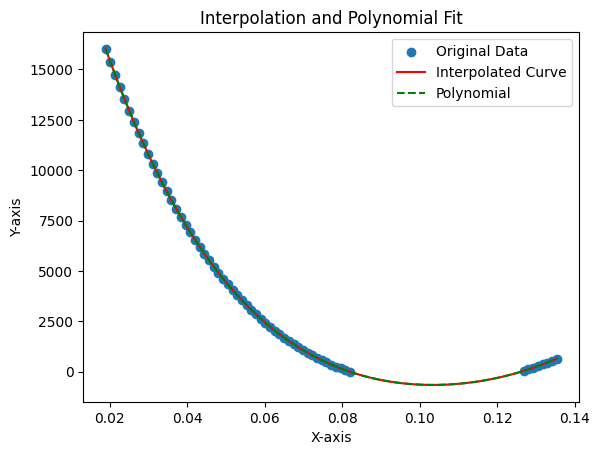

Original Y Values for the Roots:
For x = -252796909178.253418+0.000000j, y = 82180130397389951615662297678815957505577155125313536.000000
For x = 0.117709+0.079049j, y = -651.892075

Minimum b0: -651.8920751787628
Maximum b0: 8.218013039738995e+52
From_b0: -800
To_b0: -500
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.019   |   16019.291   |   -543340.169
2       |   0.020   |   15370.284   |   -527575.728
3       |   0.021   |   14740.187   |   -512139.043
4       |   0.023   |   14128.604   |   -497027.389
5       |   0.024   |   13535.143   |   -482236.043
6       |   0.025   |   12959.419   |   -467760.819
7       |   0.026   |   12401.051   |   -453597.386
8       |   0.027   |   11859.665   |   -439741.452
9       |   0.029   |   11334.889   |   -426188.713
10       |   0.030   |   10826.359   |   -412934.871
11       |   0.031   |   10333.716   |   -399975.625
12       |   0.03

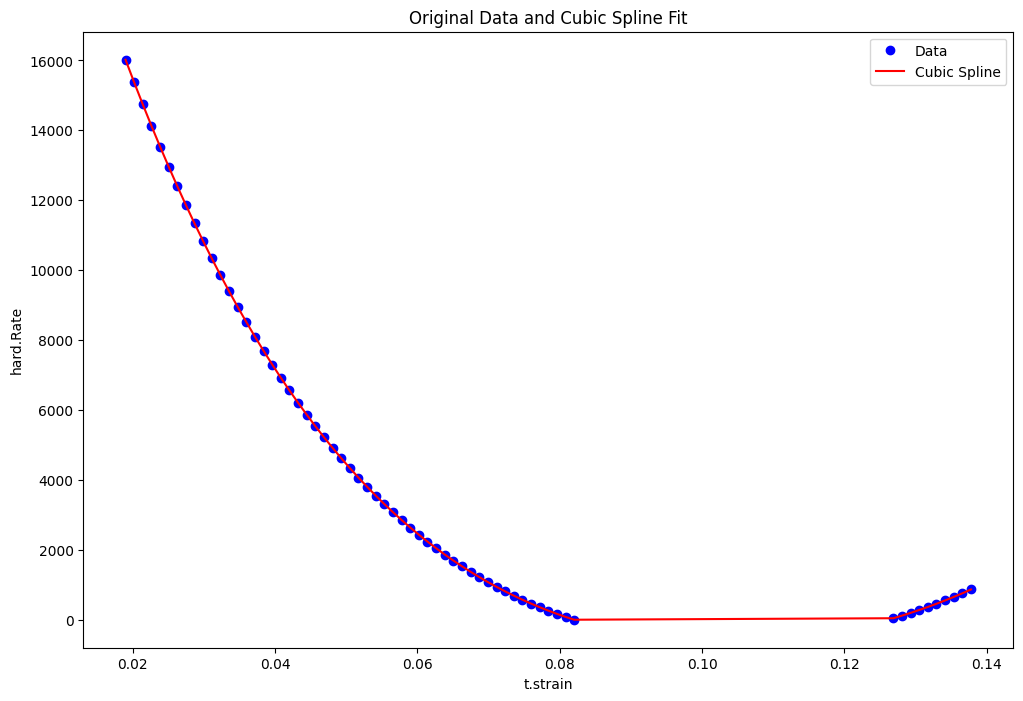

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.127   |   43.553   |   3147.870   |   59922.751
2       |   0.128   |   118.027   |   3425.622   |   63070.621
3       |   0.129   |   196.564   |   3423.624   |   66496.243
4       |   0.131   |   279.230   |   3502.039   |   69919.867

Average Slope of Printed Slopes: 64852.37058926279


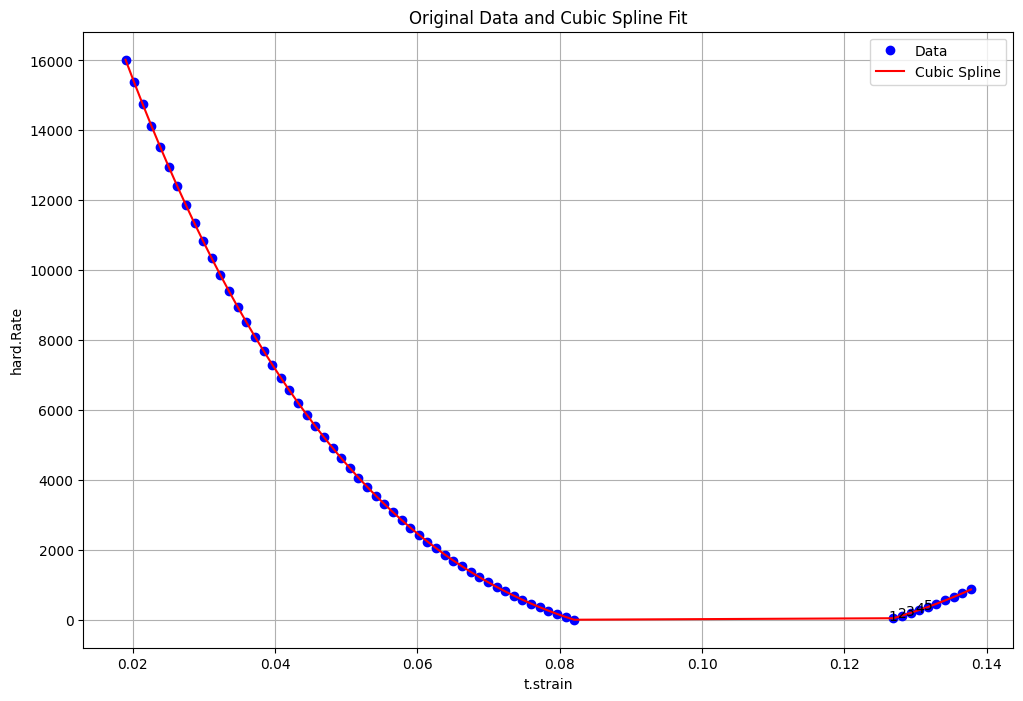


Minimum Slope: 59922.75072770727
Maximum Slope: 73421.90622942346
Finding best parameters...
Best Parameters:
B0: -800
D1: 59922
D2: 0.44999999999999996
Ei: 0.1
Plotting comparison...


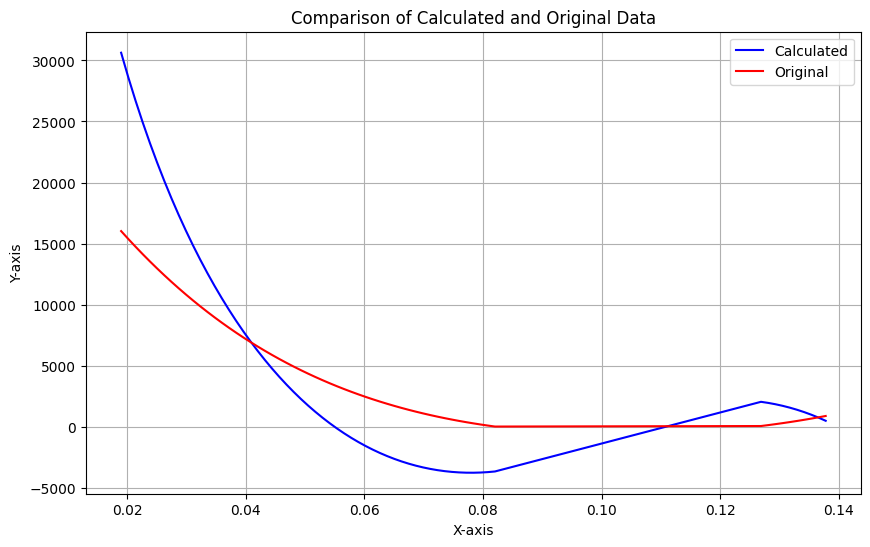

Extracting text and finding lemmas...
Finding max size chemical composition...
Extracted chemical compositions:
['Al5Ti8Fe28', 'FeCoNiCr', 'HfNbTaTiZr', 'FeNiCoAl', 'Al0.2Co1.5CrFeNi1.5Ti0', 'CrFeCoNiMo', 'Al0.1CoCrFeNi', 'FeCoNiAlTi']

Maximum sized chemical composition: Al0.2Co1.5CrFeNi1.5Ti0
extracting the n and k values from the results..
n = -2.787063988499029
k = 0.5955542407997776
Data has been updated in data.json
JSON DATA SAVED.



In [ ]:
# Loop through each folder in the data directory
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        print(f"\nPROCESSING FOLDER: {folder_name}")

        # Extract the file paths for the Excel and PDF files
        excel_file = None
        pdf_file = None
        text_file = None  # Variable to store the path of the text file

        # Loop through the files in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file is an Excel file
            if file_name.endswith("_cal.xlsx"):
                excel_file = file_path

            # Check if the file is a PDF file
            elif file_name.endswith(".pdf"):
                pdf_file = file_path

            # Check if the file is a text file
            elif file_name.endswith(".txt"):
                text_file = file_path

        # Ensure both Excel and PDF files are found and handle the case if text_file is None
        if excel_file and pdf_file:
            print(f"Found Excel file: {excel_file}")
            print(f"Found PDF file: {pdf_file}")
            if text_file:
                print(f"Found text file: {text_file}")

                # Read the link from the text file
                with open(text_file, 'r') as txt_file:
                    link = txt_file.read().strip()  # Assuming the link is on the first line and there's no leading/trailing whitespace
            else:
                print("No text file found. Ignoring link.")
                link = None  # Set link to None if no text file is found

            # Read Excel data
            data = pd.read_excel(excel_file, usecols=[0, 1, 2])
            x_axis = data.columns[0]  # First column as x_axis - strain
            y1_axis = data.columns[1]  # Second column as y1_axis - stress
            y2_axis = data.columns[2]  # Third column as y2_axis - harding rate

            # Update global variables with file paths and column names
            file_path = excel_file
            pdf_file_path = pdf_file

            # Call the method and store the returned values
            analysis_results = analyze_pdf_data(file_path, pdf_file_path, keywords, x_axis, y2_axis, k_value)

            # Prepare the new details dictionary with the returned values
            new_details = {
                "title": folder_name,
                "b0": analysis_results["best_b0"],
                "d1": analysis_results["best_d1"],
                "d2": analysis_results["best_d2"],
                "ei": analysis_results["best_ei"],
                "ee": ee,
                "lemma": analysis_results["all_lemmas"],
                "composition": analysis_results["element_dict"],
                "link": link,
                "n": analysis_results["n"],
                "k": analysis_results["k"]
            }

            json_file_path = "data.json"
            update_json_data(json_file_path, new_details)

            print("JSON DATA SAVED.\n")
        else:
            print("Error: Both Excel and PDF files are required in each folder.")
    else:
        print(f"Skipping file: {folder_name}, it is not a folder.")
